# Lab 5 Report

Author's names: Charlie Fisher, Zhenghao Guo

In [15]:
# Import Cell
import numpy as np
import simpleaudio as sa
from scipy.io import wavfile as wav
import scipy
import decimal
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
from scipy import signal as sig
import csv

## Summary

## Assignment 1 -- Identifying Component Frequencies of a Signal

<IPython.core.display.Javascript object>


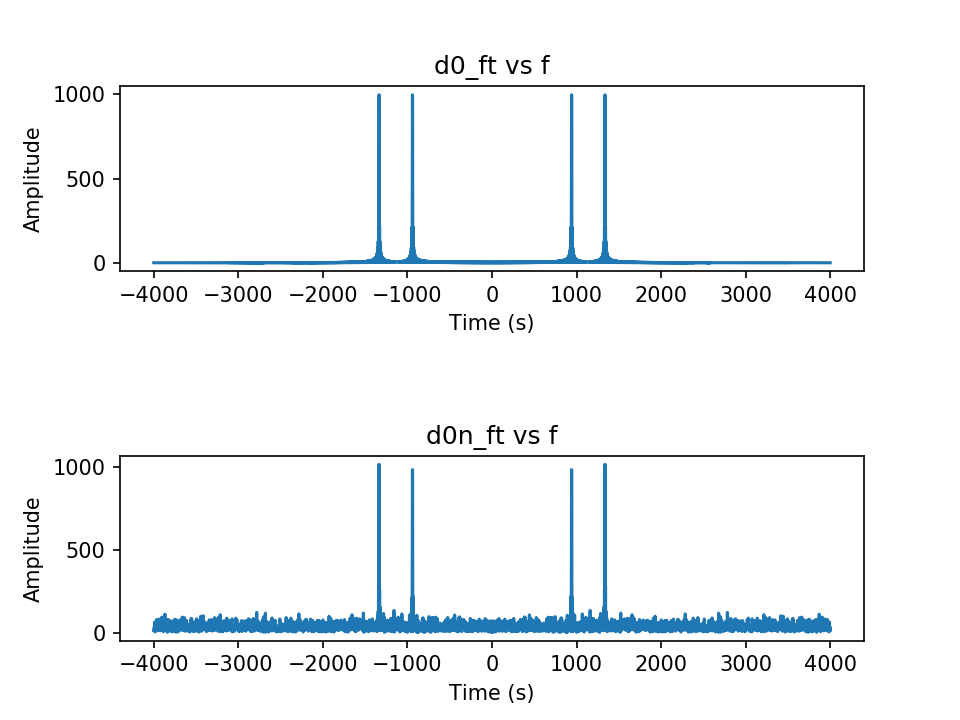

[ 941. 1336.]


Text(0.5, 1.0, 'd0n_ft vs f')

In [16]:
# Assignment 1 -- Identifying Component Frequencies of a Signal

# Part A 
fs = 8000
t = np.arange(0, .25, 1 / fs) 
d0 = np.sin(2 * np.pi * 941 * t) + np.sin(2 * np.pi * 1336 * t)
d0 = d0 * 5000

# Part B
pause = np.zeros(int(.5 * fs), dtype = np.int16)

d0_pause = np.concatenate([d0, pause, d0])
d0_pause = np.int16(d0_pause)
play_obj = sa.play_buffer(d0_pause, 1, 2, fs)
play_obj.wait_done()

# Part C
d0 = d0 / 5000
d0_ft = np.fft.fft(d0, fs)
d0_shift = np.fft.fftshift(d0_ft)
d0_abs = np.abs(d0_shift)

length = int(len(d0_abs) / 2)
f = np.arange(-1 * length, length)

fig1 = plt.figure(1)
fig1.subplots_adjust(hspace=1, wspace=1)

plt.subplot(2, 1, 1)
plt.plot(f, d0_abs)
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.title('d0_ft vs f')

# Part D
threshold = 900
a = d0_abs
ind = np.arange(len(a))
b = ind[d0_abs[ind] > threshold]
#because we shift the signal by fs/2
b = b - fs/2
b = b[b > 0]
print(b)

# Part E
noise = np.random.normal(0, 1, len(d0)) # how to do standard dev
d0n = d0 + noise

d0n_ft = np.fft.fft(d0n, fs)
d0n_shift = np.fft.fftshift(d0n_ft)
d0n_abs = np.abs(d0n_shift)

plt.subplot(2, 1, 2)
# plt.plot(np.arange(int(len(d0))), noise)
plt.plot(f, d0n_abs)

plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.title('d0n_ft vs f')


### Discussion

## Assignment 2: Classifying Touch-Tone Telephone Signals

In [17]:
# Assignment 2 -- Classifying Touch-Tone Telephone Signals

# Part A
def classify(x, fs):
        tone_freqs = np.array([[941, 697, 697, 697, 770, 770, 770, 852, 852, 852], [1336, 1209, 1336, 1477, 1209, 1336, 1477, 1209, 1336, 1477]])
        N = 4096
        xfft = np.fft.fft(x, N)
        xfft = np.fft.fftshift(xfft)
        xfft_abs = np.abs(xfft)

        ind = np.arange(len(xfft_abs))
        index_tone = ind[xfft_abs[ind] > 900]
        freq_tone = index_tone - N/2
        #in the spect it says we have to use the index that its nearest to integer
        freq_tone = freq_tone * fs / N
     
        pos_freq = freq_tone[freq_tone > 0]
      
        min_e = 1000

        for i in range (0, len(tone_freqs[0])):
            digit_error = ((tone_freqs[0][i] - pos_freq[0]) ** 2) + ((tone_freqs[1][i] - pos_freq[1]) ** 2)
            if (digit_error < min_e):
                min_e = digit_error
                min_e_tone = i

        return int(min_e_tone)
fs = 8000
t = np.arange(0,0.25, 1/fs)
d4 = np.sin(2*np.pi*770*t)+np.sin(2*np.pi*1209*t)
d5 = np.sin(2*np.pi*770*t)+np.sin(2*np.pi*1336*t)
d8 = np.sin(2*np.pi*852*t)+np.sin(2*np.pi*1336*t)
d9 = np.sin(2*np.pi*852*t)+np.sin(2*np.pi*1477*t)

print(classify(d4, fs))
print(classify(d5, fs))
print(classify(d8, fs))
print(classify(d9, fs))


4
5
8
9


### Discussion

## Assignment 3: Decoding a Phone Number from Touch-Tone Signals

In [18]:
# Assignment 3 -- Decoding a Phone Number from Touch-Tone Signals

### Discussion

In [14]:
# Part A

file = open('phonenum.csv', 'rb')
rm = np.loadtxt(file, delimiter=',')
fs = 8000

# Part B
phone_num = -1*np.ones(11)

# Part C

for i in range (0, 11):
#start index to end index
    signal = rm[(int(i * 0.5 * 8000)):(int(i * 0.5 * 8000 + 0.5*8000))]
    phone_num[i] = classify(signal, fs)

# Part D

print(np.int16(phone_num))

[1 8 0 0 7 8 6 1 0 0 0]


this is In-N-Out burger